In [1]:
import bz2
from numpy import*
from pylab import*
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit

In [2]:
file = open("nahuelito_press-rate.dat")

data_ra = []
data_raMu = []
data_pr = []
data_ti = []

for line in file:
    tmp = line.rstrip('\n').split(' ')
    
    tmp2 = datetime.strptime(tmp[0]+" "+tmp[1], "%Y-%m-%d %H:%M")
    data_ti.append( tmp2 )
    data_pr.append( float(tmp[2]) )
    data_ra.append( float(tmp[3]) )
    data_raMu.append( float(tmp[4]) )
    
    
data_ti = np.array(data_ti)
data_pr = np.array(data_pr)
data_ra = np.array(data_ra)
data_raMu = np.array(data_raMu)

data_raMu /= 9.65 # Nahuelito's total effective area
data_ra /= 9.65

In [3]:
i_prom = np.mean(data_ra)
p_prom = np.mean(data_pr)

deltaI = (data_ra - i_prom) / i_prom
deltaP = data_pr - p_prom

i_promM = np.mean(data_raMu)
deltaM = (data_raMu - i_promM) / i_promM

def linear(x, a):
    return a*x

pars, cov = curve_fit(linear, deltaP, deltaI, p0 = [0.])
parsM, covM = curve_fit(linear, deltaP, deltaM, p0 = [0.])

print("===========================")
print("Beta =", pars[0]*-100,"%")
print("===========================")

deltaIc = deltaI - deltaP*pars[0]
i_corr = i_prom * ( 1 + deltaIc )

deltaMc = deltaM - deltaP*parsM[0]
i_corrM = i_promM * ( 1 + deltaMc )

Beta = 0.373491539951 %


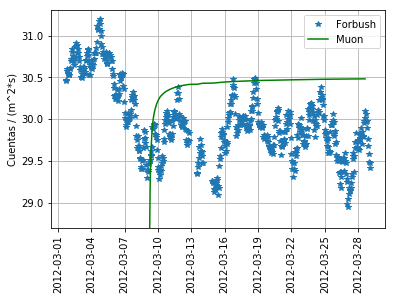

In [4]:
rs = loadtxt("archivo1.dat", float)

a = 880
b = 1500


plt.plot(data_ti[a:b], data_raMu[a:b],'*',label="Forbush")
#plt.plot(data_ti[a+171:b-20], data_ra[a+171:b-20], 'r')

#plt.plot(data_ti[a+180:b-11], rs[:,0]*0.0003223, 'm',label="Total particulas")
plt.plot(data_ti[a+180:b-11], rs[:,1]*0.0000738223, 'g',label="Muon")

plt.ylabel("Cuentas / (m^2*s)")
plt.xticks(rotation=90)

plt.ylim(28.7, 31.3)
plt.legend()
plt.grid()
plt.show()

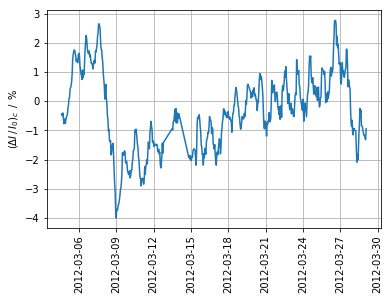

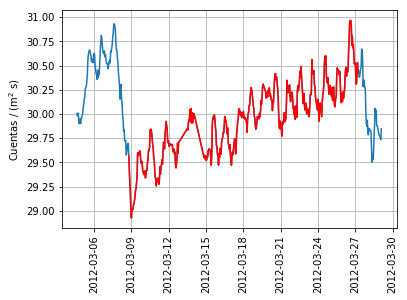

In [5]:
a = 950
b = 1500

plt.plot(data_ti[a:b], deltaMc[a:b]*100)

#plt.xlim(data_ti[a], data_ti[b])

plt.ylabel("$(\Delta I\,/\,I_0)_{c}\,\,\,/\,\,\,\%$")
plt.xticks(rotation=90)

plt.grid()
plt.show()

plt.plot(data_ti[a:b], i_corrM[a:b])
plt.plot(data_ti[a+100:b-45], i_corrM[a+100:b-45], 'r')

plt.ylabel("Cuentas / (m$^2$ s)")
plt.xticks(rotation=90)

plt.grid()
plt.show()

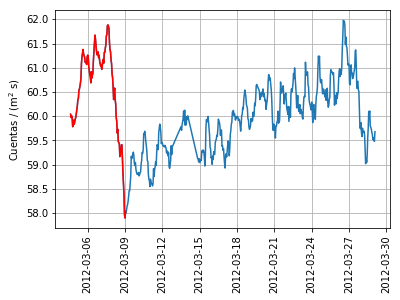

promedio total 550
promedio 107
19.454545454545453


In [6]:
l = 950
c = 1057

plt.plot(data_ti[a:b], i_corr[a:b])
plt.plot(data_ti[l:c], i_corr[l:c], 'r')

plt.ylabel("Cuentas / (m$^2$ s)")
plt.xticks(rotation=90)

plt.grid()
plt.show()


print("promedio total", 550)
h=550
#h=sum(i_corr[a:b])/len(i_corr[a:b])
print("promedio",107)
j=107
#j=(sum(i_corr[l:c])/len(i_corr[l:c]))
m=(j/h)*100
print(m)

In [7]:
def expon(x, a1, a2, a3):
    return a1 + a1*np.exp(x*a2)

def pol2(x, a1, a2, a3):
    return a3*x*x + a2*x + a1

def poto(x, a1, a2, a3):
    return a1 + a2*x**(a3)

In [8]:
a = 950
b = 1500

limi = a+100
lims = b-45

xtime = np.array([i for i in range(lims-limi)], float)

parsEx, covEx = curve_fit(expon, xtime, i_corrM[limi:lims], p0 = [0., 0., 0.])
parspl2, covpl2 = curve_fit(pol2, xtime, i_corrM[limi:lims], p0 = [0., 0., 0])
parsPo, covPo = curve_fit(poto, xtime, i_corrM[limi:lims], p0 = [0., 0.2, 0.2])

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


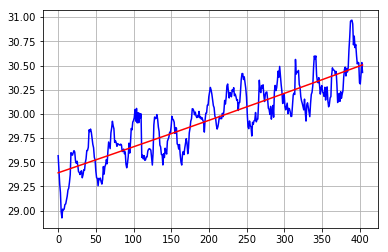

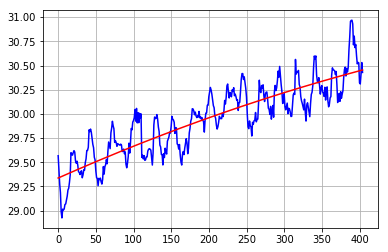

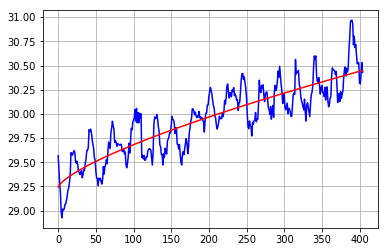

In [9]:
plt.plot(xtime, i_corrM[limi:lims], 'b')
plt.plot(expon(xtime, parsEx[0], parsEx[1], parsEx[2]), 'r')

plt.grid()
plt.show()

plt.plot(xtime, i_corrM[limi:lims], 'b')
plt.plot(pol2(xtime, parspl2[0], parspl2[1], parspl2[2]),'r')

plt.grid()
plt.show()

plt.plot(xtime, i_corrM[limi:lims], 'b')
plt.plot(poto(xtime, parsPo[0], parsPo[1], parsPo[2]), 'r')

plt.grid()
plt.show()

In [10]:
a = 950
b = 1500

limi = a+100
lims = b-45

print(data_ti[a])

xtime = np.array([i for i in range(lims-limi)], float)

parsEx, covEx = curve_fit(expon, xtime, i_corr[limi:lims], p0 = [0., 0., 0.])
parspl2, covpl2 = curve_fit(pol2, xtime, i_corr[limi:lims], p0 = [0., 0., 0])
parsPo, covPo = curve_fit(poto, xtime, i_corr[limi:lims], p0 = [0., 0.2, 0.2])



2012-03-04 15:00:00


/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


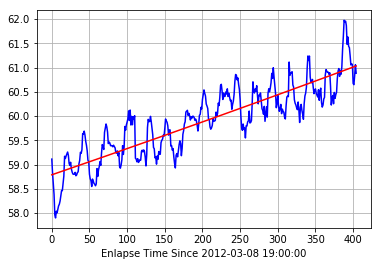

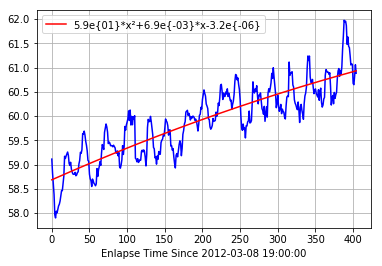

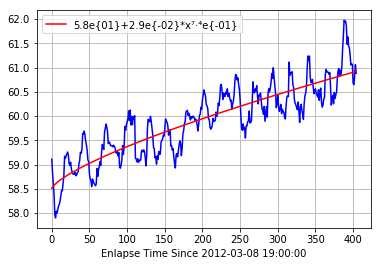

In [11]:
plt.plot(xtime, i_corr[limi:lims], 'b')
plt.plot(expon(xtime, parsEx[0], parsEx[1], parsEx[2]), 'r')


def poto(x, a1, a2, a3):
    return a1 + a2*x**(a3)

plt.xlabel("Enlapse Time Since 2012-03-08 19:00:00")

plt.grid()
plt.show()

plt.plot(xtime, i_corr[limi:lims], 'b')
plt.plot(pol2(xtime, parspl2[0], parspl2[1], parspl2[2]),'r',label="5.9e{01}*x²+6.9e{-03}*x-3.2e{-06}")

plt.xlabel("Enlapse Time Since 2012-03-08 19:00:00")

plt.legend()
plt.grid()
plt.show()


plt.plot(xtime, i_corr[limi:lims], 'b')
plt.plot(poto(xtime, parsPo[0], parsPo[1], parsPo[2]), 'r',label="5.8e{01}+2.9e{-02}*x⁷·⁴e{-01}")

plt.xlabel("Enlapse Time Since 2012-03-08 19:00:00")

plt.legend()
plt.grid()
plt.show()

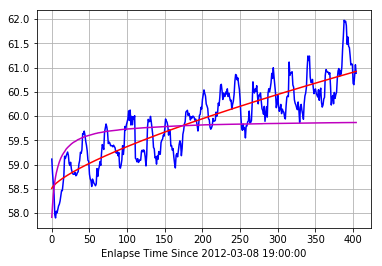

In [12]:
r = loadtxt("archivo.dat", float)


plt.plot(xtime, i_corr[limi:lims], 'b')
plt.plot(poto(xtime, parsPo[0], parsPo[1], parsPo[2]), 'r',label="5.8e{01}+2.9e{-02}*x⁷·⁴e{-01}")
plt.plot(xtime, r[:,0]*0.0000327409060171, 'm')
#plt.plot(xtime, r[:,1]*0.0001445245533345, 'g')


plt.xlabel("Enlapse Time Since 2012-03-08 19:00:00")
#plt.legend()
plt.grid()
plt.show()

# Reading Rigidity Cut-off

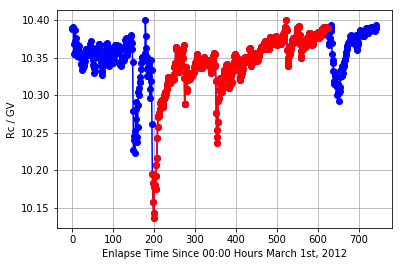

In [13]:
rcdata = np.loadtxt("average_rc_march2012.dat")
rs = loadtxt("archivo1.dat", float)


x = np.linspace(0, 743, 744)

a = 196
b = 625

plt.plot(x, rcdata, "-ob")
plt.plot(x[a:b], rcdata[a:b], "-or")

plt.xlabel("Enlapse Time Since 00:00 Hours March 1st, 2012")
plt.ylabel("Rc / GV")

plt.grid()
plt.show()

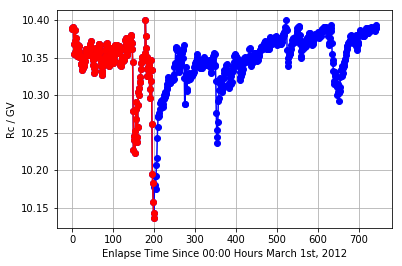

In [14]:
rcdata = np.loadtxt("average_rc_march2012.dat")

x = np.linspace(0, 743, 744)

ñ = 0
s = 201

plt.plot(x, rcdata, "-ob")
plt.plot(x[ñ:s], rcdata[ñ:s], "-or")

plt.xlabel("Enlapse Time Since 00:00 Hours March 1st, 2012")
plt.ylabel("Rc / GV")

plt.grid()
plt.show()



## Average before  the Forbush

In [15]:
def poto(x, a1, a2, a3):
    return a1 + a2*x**(a3)

rcFd = []
a1 = np.average(rcdata[0:148])
a2 = np.average(rcdata[0:201])*1.945
a3 = parsPo[2]
print(a1, a2, a3)

for i in range(197,626):
    rcFd.append( poto(i-196, a1, a2, -a3) )
    
rcFd = np.array(rcFd)

10.3563763514 20.1138933333 0.737409060171


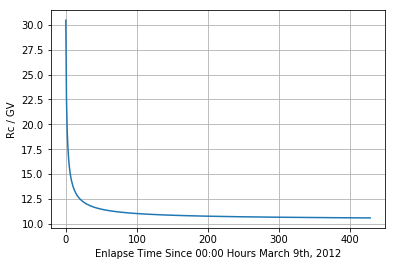

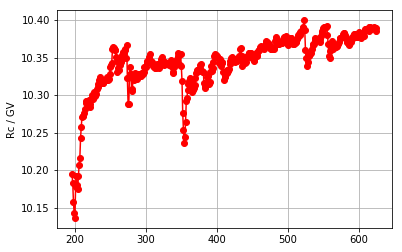

In [16]:
plt.plot(rcFd)

plt.xlabel("Enlapse Time Since 00:00 Hours March 9th, 2012")
plt.ylabel("Rc / GV")

plt.grid()
plt.show()


x = np.linspace(0, 743, 744)

a = 196
b = 626

plt.plot(x[a:b], rcdata[a:b], "-or")

plt.ylabel("Rc / GV")

plt.grid()
plt.show()

In [17]:
tmp = np.zeros(5, float)

h = 0
for rc in (rcFd):
    nf = "rigitiesFdMarch2012"+str(h)+".dat"
    f = open(nf, "w")
    for the in range(0, 91, 3):
        for phi in range(0, 375, 15):
            f.write(str(the)+"\t"+str(phi)+"\t"+str(rc)+"\t"+str(rc)+"\t"+str(rc))
            f.write('\n')
    h += 1
    f.close()

In [18]:
print(len(rcFd))

429


In [19]:
!head rigitiesFdMarch2012345.dat

0	0	10.6262487213	10.6262487213	10.6262487213
0	15	10.6262487213	10.6262487213	10.6262487213
0	30	10.6262487213	10.6262487213	10.6262487213
0	45	10.6262487213	10.6262487213	10.6262487213
0	60	10.6262487213	10.6262487213	10.6262487213
0	75	10.6262487213	10.6262487213	10.6262487213
0	90	10.6262487213	10.6262487213	10.6262487213
0	105	10.6262487213	10.6262487213	10.6262487213
0	120	10.6262487213	10.6262487213	10.6262487213
0	135	10.6262487213	10.6262487213	10.6262487213
